Fraud Detection using Machine Learning

DATA VIEWING AND CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.max_rows', 500)
dataset_path="/mnt/DATA/EE22B013/Btech_project/Sentiment_Analysis/Fraud.csv" # dataset path 
df=pd.read_csv(dataset_path)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
#Random view 
pd.set_option('display.max_columns', 1000)
df.iloc[10000:12100]


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
10000,7,TRANSFER,929560.40,C1329505805,150562.57,0.00,C1787868648,8171.00,15128076.87,0,0
10001,7,PAYMENT,823.18,C420504560,0.00,0.00,M916634690,0.00,0.00,0,0
10002,7,PAYMENT,8053.30,C1954091312,0.00,0.00,M1313722236,0.00,0.00,0,0
10003,7,PAYMENT,4095.66,C1415068326,438279.00,434183.34,M2000407747,0.00,0.00,0,0
10004,7,PAYMENT,49.37,C1274524549,50253.00,50203.63,M1801565096,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
12095,7,PAYMENT,12667.97,C1732685739,125222.22,112554.25,M1748006732,0.00,0.00,0,0
12096,7,CASH_OUT,180157.65,C587650668,112554.25,0.00,C683605346,938240.41,1371546.23,0,0
12097,7,CASH_OUT,170821.76,C56812069,0.00,0.00,C1446521801,6416788.60,11698172.69,0,0
12098,7,PAYMENT,2535.90,C1368079893,10774.00,8238.10,M980068735,0.00,0.00,0,0


In [4]:
#class balance
df['isFraud'].value_counts(normalize=True)

isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64

In [5]:
df[(df['isFlaggedFraud']==1) & (df['isFraud']==0) ] # no such cases where fraud is not there but flagged fraud is there

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


In [6]:
df.isnull().sum() # we dont have any null values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

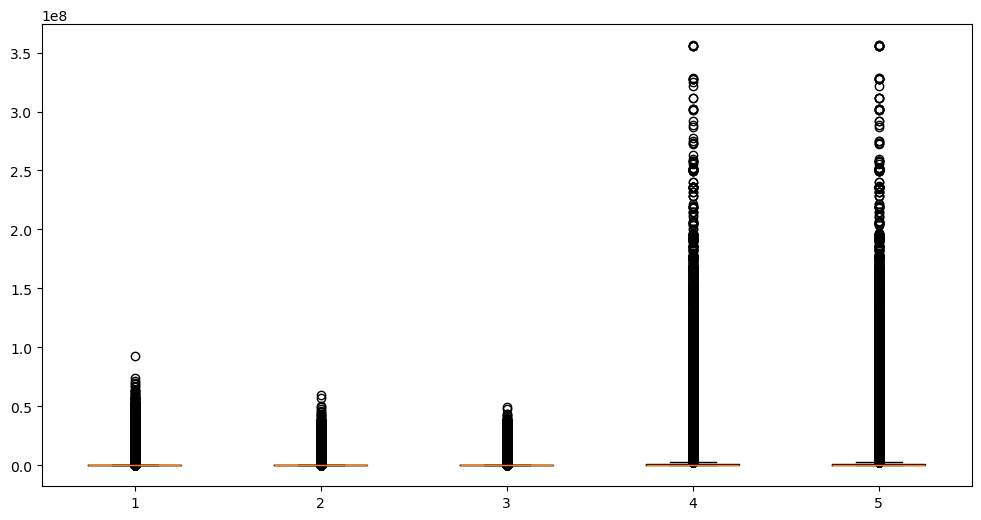

In [7]:
# Searching for Outliers
plt.figure(figsize=(12,6))
plt.boxplot(df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']])
plt.show()

In [8]:
df['balance_orig']=df['oldbalanceOrg']-df['newbalanceOrig'] # balance change for origin, positive means money is taken out
df['balance_dest']=df['newbalanceDest']-df['oldbalanceDest'] # balance change for destination, positive means money is added

# For using linear models and not letting outliers disturb we will use log transformation
df['lo_amount']=np.log1p(df['amount'])
df['log_balance_orig'] = np.log1p(df['balance_orig'].clip(lower=0))
df['log_balance_dest'] = np.log1p(df['balance_dest'].clip(lower=0))

df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig,balance_dest,lo_amount,log_balance_orig,log_balance_dest
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,9.194276,9.194276,0.000000
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,7.531166,7.531166,0.000000
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,5.204007,5.204007,0.000000
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00,5.204007,5.204007,0.000000
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,9.364703,9.364703,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,12.735768,12.735768,12.735768
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,15.657870,15.657870,0.000000
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27,15.657870,15.657870,15.657870
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,13.652996,13.652996,0.000000


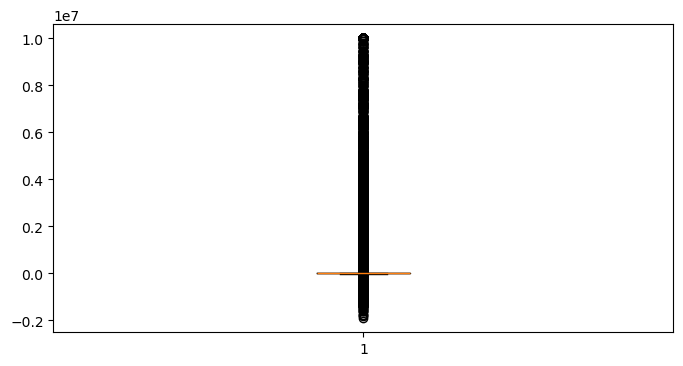

In [9]:
#searching for outliers in balance often means FRauds
plt.figure(figsize=(8,4))
plt.boxplot(df[['balance_orig']])
plt.show()

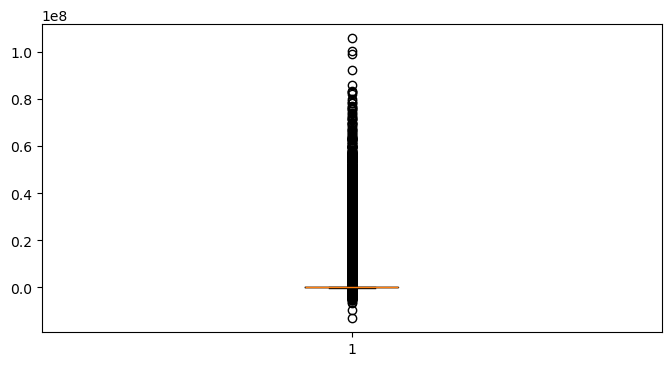

In [10]:
plt.figure(figsize=(8,4))
plt.boxplot(df[['balance_dest']])
plt.show()

In [11]:
Q1 = df['balance_orig'].quantile(0.25)
Q3 = df['balance_orig'].quantile(0.75)
IQR = Q3 - Q1

# Outliers are values outside 1.5*IQR
outliers_orig = df[(df['balance_orig'] < Q1 - 1.5*IQR) | 
                   (df['balance_orig'] > Q3 + 1.5*IQR)]
print(f"Number of outliers in origin balance change: {len(outliers_orig)}")

Q1_dest = df['balance_dest'].quantile(0.25)
Q3_dest = df['balance_dest'].quantile(0.75)
IQR_dest = Q3_dest - Q1_dest

outliers_dest = df[(df['balance_dest'] < Q1_dest - 1.5*IQR_dest) |
                   (df['balance_dest'] > Q3_dest + 1.5*IQR_dest)]
print(f"Number of outliers in destination balance change: {len(outliers_dest)}")

Number of outliers in origin balance change: 2139299
Number of outliers in destination balance change: 886695


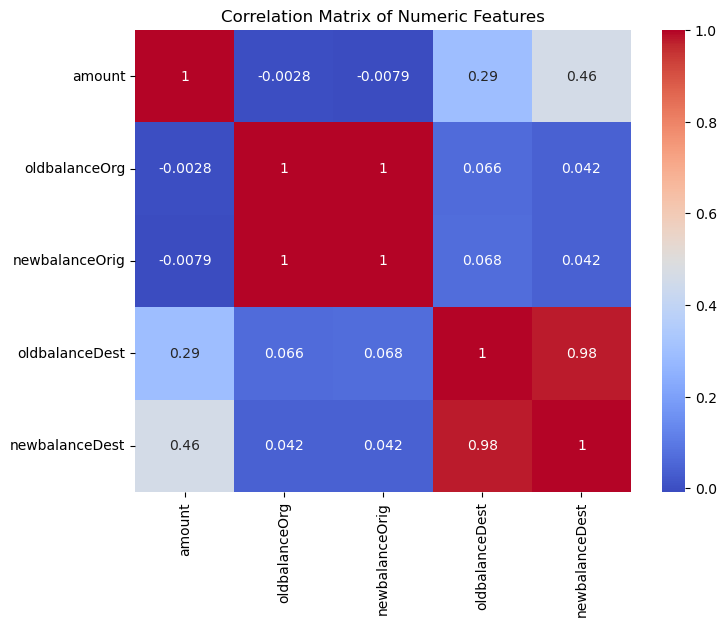

In [12]:
# To check for multicollinearity
plt.figure(figsize=(8,6))
numeric_features=df[['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']]
corr_matrix=numeric_features.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

There is High Collinearity for oldbalance and newbalance in origin account and similarly for destination account also. These columns can make linear models unstable therefore we will keep balance changes column earlier made instead of these ones.

In [13]:
#We will be making a new column which will contain those transactions which are possibly frauds will name as 'suspicious'
# Conditions for suspicious transactions:if there are any outliers in balances or amounts

def is_suspicious(column):
    Q1=column.quantile(0.25)
    Q3=column.quantile(0.75)
    IQR=Q3-Q1
    return (column < Q1 - 1.5 * IQR) | (column > Q3 + 1.5 * IQR)

df['suspicious_amount'] = is_suspicious(df['amount'])
df['suspicious_balance_orig'] = is_suspicious(df['balance_orig'])
df['suspicious_balance_dest'] = is_suspicious(df['balance_dest'])

#combining all suspicious columns which will return true if any of the three is true
df['suspicious'] = df[['suspicious_amount', 'suspicious_balance_orig', 'suspicious_balance_dest']].any(axis=1)
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig,balance_dest,lo_amount,log_balance_orig,log_balance_dest,suspicious_amount,suspicious_balance_orig,suspicious_balance_dest,suspicious
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,9.194276,9.194276,0.000000,False,False,False,False
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,7.531166,7.531166,0.000000,False,False,False,False
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,5.204007,5.204007,0.000000,False,False,False,False
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00,5.204007,5.204007,0.000000,False,False,False,False
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,9.364703,9.364703,0.000000,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,12.735768,12.735768,12.735768,False,True,False,True
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,15.657870,15.657870,0.000000,True,True,False,True
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27,15.657870,15.657870,15.657870,True,True,True,True
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,13.652996,13.652996,0.000000,True,True,False,True


For Feature Selection and Editing:
1.In Transaction type we have CASH_IN,CASH_OUT,PAYMENT,TRANSFER,DEBIT typer we will apply one hot encoding to this column 
2.Amount will be taken as one of the feature
3.We will not consider name column because it doesn't have any effect on the fraud activity
4.Instead of redundant features like old and new columns we will keep balance changes columns which we made earlier
5.Suspicious column will be taken as one of the feature.
6.We will make one more column to check if the transaction is being made to merchant or customer as fraudsters are more likely to transfer the money to different account rather than merchants.
7.We will also make one column which will calculate the ratio of (amount to old balance) as fraudsters will likely try to drain the whole account completely. So this feature will indicate us that even if the amount is not large but the proportion to account balance is large enough it could be a fraud.
8.We will make a feature for analysing time patterns of the fraud.
9.isflaggedfraud is the hard coded fraud detection model which will assign any transaction grerater than 200,000 as fraud we cant have it as our input because it could cheat our model during training

In [14]:
#making a column to check if the transaction is being made to merchant or customer
df['dest_is_merchant'] = df['nameDest'].str.startswith('M')
#making a column which will calculate the ratio of (amount to old balance)
df['amount_to_balance_ratio'] = df['amount'] / (df['oldbalanceOrg'] + 1) # adding 1 to avoid division by zero
#making a feature for analysing time patterns of the fraud
df['hour'] = df['step'] % 24

#One hot encoding for type column
df=pd.get_dummies(df,columns=['type'],drop_first=True)
df

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balance_orig,balance_dest,lo_amount,log_balance_orig,log_balance_dest,suspicious_amount,suspicious_balance_orig,suspicious_balance_dest,suspicious,dest_is_merchant,amount_to_balance_ratio,hour,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0,9839.64,0.00,9.194276,9.194276,0.000000,False,False,False,False,True,0.057834,1,False,False,True,False
1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0,1864.28,0.00,7.531166,7.531166,0.000000,False,False,False,False,True,0.087731,1,False,False,True,False
2,1,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0,181.00,0.00,5.204007,5.204007,0.000000,False,False,False,False,False,0.994505,1,False,False,False,True
3,1,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0,181.00,-21182.00,5.204007,5.204007,0.000000,False,False,False,False,False,0.994505,1,True,False,False,False
4,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0,11668.14,0.00,9.364703,9.364703,0.000000,False,False,False,False,True,0.280788,1,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0,339682.13,339682.13,12.735768,12.735768,12.735768,False,True,False,True,False,0.999997,23,True,False,False,False
6362616,743,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0,6311409.28,0.00,15.657870,15.657870,0.000000,True,True,False,True,False,1.000000,23,False,False,False,True
6362617,743,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0,6311409.28,6311409.27,15.657870,15.657870,15.657870,True,True,True,True,False,1.000000,23,True,False,False,False
6362618,743,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0,850002.52,0.00,13.652996,13.652996,0.000000,True,True,False,True,False,0.999999,23,False,False,False,True


In [15]:
#Keeping only necessary columns and removing others
#For LInear models we will keep log transformed columns and balance change columns
#For tree based models we will keep original amount and balance change columns

features_linear=['lo_amount','log_balance_orig','log_balance_dest','suspicious','dest_is_merchant','amount_to_balance_ratio','hour','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']
features_tree=['amount','balance_orig','balance_dest','suspicious','dest_is_merchant','amount_to_balance_ratio','hour','type_CASH_OUT','type_DEBIT','type_PAYMENT','type_TRANSFER']

X_linear=df[features_linear]
X_tree=df[features_tree]
y=df['isFraud']


# Splitting the data into training and testing sets
X_train_linear,X_test_linear,y_train_linear,y_test_linear=train_test_split(X_linear,y,test_size=0.2,random_state=42,stratify=y)
X_train_tree,X_test_tree,y_train_tree,y_test_tree=train_test_split(X_tree,y,test_size=0.2,random_state=42,stratify=y)

X_train_linear.shape, X_test_linear.shape, y_train_linear.shape, y_test_linear.shape

((5090096, 11), (1272524, 11), (5090096,), (1272524,))

In [16]:
from imblearn.over_sampling import SMOTE
# Applying SMOTE to training data to balance dataset
smote = SMOTE(random_state=42)
X_train_linear_res, y_train_linear_res = smote.fit_resample(X_train_linear, y_train_linear)

X_train_linear_res.shape, y_train_linear_res.shape

((10167052, 11), (10167052,))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay
# Training a Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_linear_res, y_train_linear_res)
y_pred_linear = log_reg.predict(X_test_linear)
y_prob_linear = log_reg.predict_proba(X_test_linear)[:, 1]  

print("Classification Report for Logistic Regression:")
print(classification_report(y_test_linear, y_pred_linear))
print("Confusion Matrix:")
print(confusion_matrix(y_test_linear, y_pred_linear))
print(f"ROC-AUC Score: {roc_auc_score(y_test_linear, y_prob_linear):.4f}")

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# Training a Random Forest Classifier

rf=RandomForestClassifier(n_estimators=200,class_weight='balanced', random_state=42,n_jobs=-1)
rf.fit(X_train_tree, y_train_tree)
y_pred_tree = rf.predict(X_test_tree)
y_prob_tree = rf.predict_proba(X_test_tree)[:, 1]
print("Classification Report for Random Forest:")
print(classification_report(y_test_tree, y_pred_tree))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tree, y_pred_tree))
print(f"ROC-AUC Score: {roc_auc_score(y_test_tree, y_prob_tree):.4f}")

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       1.00      1.00      1.00      1643

    accuracy                           1.00   1272524
   macro avg       1.00      1.00      1.00   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270880       1]
 [      7    1636]]
ROC-AUC Score: 0.9988


In [ ]:
import xgboost as xgb
# Training an XGBoost Classifier
xgb_clf=xgb.XGBClassifier(n_estimators=200,scale_pos_weight=10, use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_clf.fit(X_train_tree, y_train_tree)
y_pred_xgb = xgb_clf.predict(X_test_tree)
y_prob_xgb = xgb_clf.predict_proba(X_test_tree)[:, 1]
print("Classification Report for XGBoost:")
print(classification_report(y_test_tree, y_pred_xgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tree, y_pred_xgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test_tree, y_prob_xgb):.4f}")

/mnt/DATA/EE22B013/miniconda3/envs/data12/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [00:09:03] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.73      0.93      0.82      1643

    accuracy                           1.00   1272524
   macro avg       0.86      0.97      0.91   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1270301     580]
 [    109    1534]]
ROC-AUC Score: 0.9988


In [ ]:
import lightgbm as lgb
# Training a LightGBM Classifier
lgb_clf=lgb.LGBMClassifier(n_estimators=200, class_weight='balanced', random_state=42)
lgb_clf.fit(X_train_tree, y_train_tree) 
y_pred_lgb = lgb_clf.predict(X_test_tree)
y_prob_lgb = lgb_clf.predict_proba(X_test_tree)[:, 1]
print("Classification Report for LightGBM:")
print(classification_report(y_test_tree, y_pred_lgb))
print("Confusion Matrix:")
print(confusion_matrix(y_test_tree, y_pred_lgb))
print(f"ROC-AUC Score: {roc_auc_score(y_test_tree, y_prob_lgb):.4f}")

[LightGBM] [Info] Number of positive: 6570, number of negative: 5083526
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.025562 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1056
[LightGBM] [Info] Number of data points in the train set: 5090096, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
Classification Report for LightGBM:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270881
           1       0.40      0.96      0.57      1643

    accuracy                           1.00   1272524
   macro avg       0.70      0.98      0.78   1272524
weighted avg       1.00      1.00      1.00   1272524

Confusion Matrix:
[[1268556    2325]
 [     61    1582]]
ROC-AUC Score: 0.99

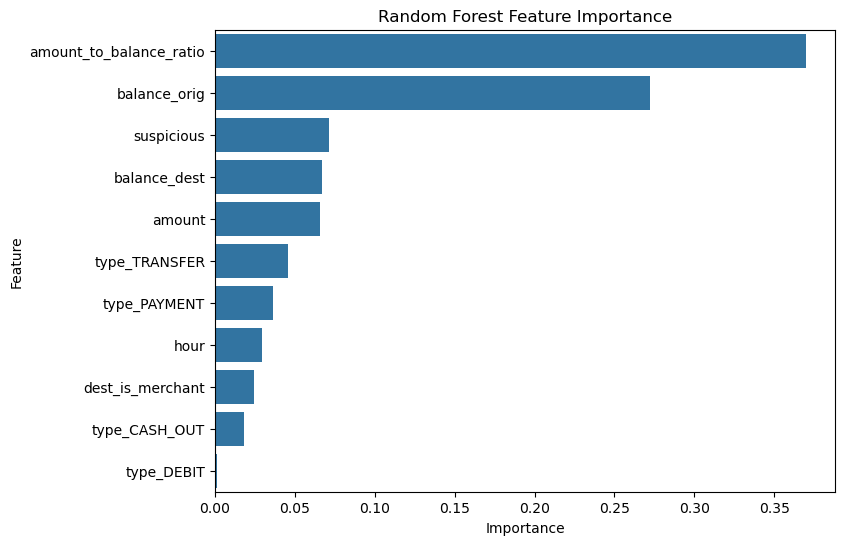

In [ ]:
# lets determine feature importance for tree based models

#Random Forest Feature Importance

rf_inportance =pd.DataFrame({
    'Feature':X_train_tree.columns,
    'Importance':rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=rf_inportance)
plt.title('Random Forest Feature Importance')
plt.show()